## Homework 4: Pymaceuticals
In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read clinical trial data into dataframe
clinical_df = pd.read_csv('raw_data\clinicaltrial_data.csv')
#clinical_df.head()

In [3]:
# Read mouse drug data into dataframe
mouse_drug_df = pd.read_csv('raw_data\mouse_drug_data.csv')
#mouse_drug_df.head()

In [7]:
# Merge clinical and mouse drug dataframes
results_df = pd.merge(clinical_df, mouse_drug_df,how='inner',on='Mouse ID')
results_df.head()
#results_df.info()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [46]:
# Group by Drug and Timepoint and show average tumor volume
tumor_vol = pd.DataFrame(results_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean())
tumor_vol

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [24]:
# Show all Drugs on columns and Timepoint on row with Tumor Volume in values
tv_df = results_df.pivot_table(values='Tumor Volume (mm3)',index=['Timepoint'],columns=['Drug']) 
tv_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [21]:
# Filter Tumor Response by Selected 4 Drugs 
sel_drug_tv = results_df[(results_df['Drug']=='Capomulin') | (results_df['Drug']=='Infubinol') 
                         | (results_df['Drug']=='Ketapril') | (results_df['Drug']=='Placebo')]
#sel_drug_tv.head(3)

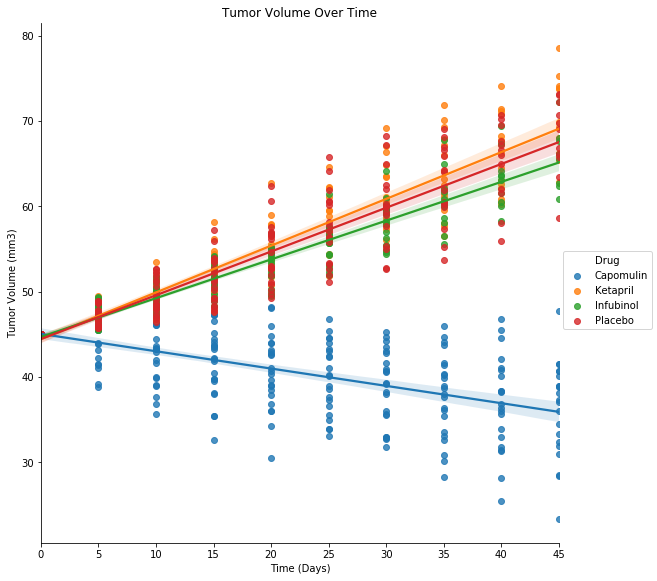

In [19]:
# Plot scatter graph of four select drugs
tv = sns.lmplot(x='Timepoint', y='Tumor Volume (mm3)', data=sel_drug_tv, hue='Drug',size=8)
tv.set(xlim=(0,45))
plt.xlabel('Time (Days)')
plt.title('Tumor Volume Over Time')
plt.show() 

**Observations Regarding Tumor Volume Over Time in Response to Drugs**                                                  
Over the course of 45 days, out of ten drugs, two have shown to decrease tumor volume. Out of four treatments of interest (Capomulin, Infubinol, Ketapril, and Placebo), only Capomulin has resulted in tumor volume decrease over the 45 day treatment period.

## Metastatic Sites Change Over Time

In [45]:
# Group by Drug and Timepoint and show average Metastatic Sites
meta_sites = pd.DataFrame(results_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean())
meta_sites

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111
          25                 1.500000
          30                 1.937500
          35                 2.071429
          40                 2.357143
          45                 2.692308
Infubinol 0                  0.000000
          5                  0.280000
          10                 0.666667
          15                 0.904762
          20                 1.050000
          25                 1.277778
          30                 1.588235
          35                 1.666667
          40                 2.100000
          45                 2.111111
...                               ...
Ramicane  0                  0.000000
          5                  0.120000
          10                 0.250000
          15                 0.333333
          20                 0.347826
          25                 0.652174
          30                 0.782609
          35                 0.952381
          40                 1.100000
          45                 1.250000
Stelasyn  0                  0.000000
          5                  0.240000
          10                 0.478261
          15                 0.782609
          20                 0.952381
          25                 1.157895
          30                 1.388889
          35                 1.562500
          40                 1.583333
          45                 1.727273
Zoniferol 0                  0.000000
          5                  0.166667
          10                 0.500000
          15                 0.809524
          20                 1.294118
          25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [34]:
# Show all Drugs on columns and Timepoint on row with Metastatic Sites in values
ms_df = results_df.pivot_table(values='Metastatic Sites',index=['Timepoint'],columns=['Drug']) 
ms_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


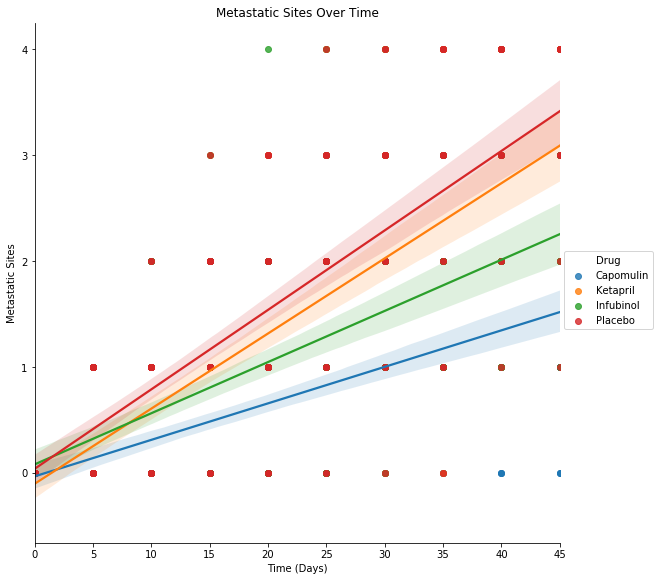

In [40]:
# Plot scatter graph of Metastatic Sites for the four select drugs
ms = sns.lmplot(x='Timepoint', y='Metastatic Sites', data=sel_drug_tv, hue='Drug', size=8)
ms.set(xlim=(0,45))
plt.xlabel('Time (Days)')
plt.title('Metastatic Sites Over Time')
plt.show() 

**Observations Regarding Number of Metastatic Sites Over Time in Response to Drugs**                                        
Out of four treatments of interest (Capomulin, Infubinol, Ketapril, and Placebo), Capomulin has resulted in lowest number of metastatic sites over the 45 day treatment period.

## Survival Rates by Drug

In [42]:
surv_rates = results_df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
print(surv_rates)

Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
           25           22
           30           22
           35           22
           40           21
           45           21
Ceftamin   0            25
           5            21
           10           20
           15           19
           20           18
           25           18
           30           16
           35           14
           40           14
           45           13
Infubinol  0            25
           5            25
           10           21
           15           21
           20           20
           25           18
           30           17
           35           12
           40           10
           45            9
                        ..
Ramicane   0            25
           5            25
           10           24
           15           24
           20           23
       

In [47]:
# Calculate Survival Rates for each drug over 45 days treatment
# logic is for each drug, timepoint: 0-45, calc change in Mouse ID count for each timepoint.loc[x] to timepoint.loc[0]


In [16]:
# Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)

In [ ]:
# Calculate Tumor Volume Change for each drug at 45 days vs 0 day
# logic is for each drug, calc change in Tumor Vol for timepoint.loc[45] to timepoint.loc[0]

In [ ]:
# Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.